In [40]:
from glob import glob
import feather
import pandas as pd
import matplotlib.pyplot as plt
import re
from decimal import Decimal

In [9]:
feathers = sorted(glob('./data/merged_feathers/*.feather'))

In [17]:
dates = []
for file_path in feathers:
    dates.append(re.search('wdvc16_(.*).feather', file_path).group(1))

In [ ]:
vandalism_frequency = []
for file_path in feathers:
    df = feather.read_dataframe(file_path)
    vandalism_frequency.append(Decimal(df.truth.sum()) / Decimal(df.shape[0]))

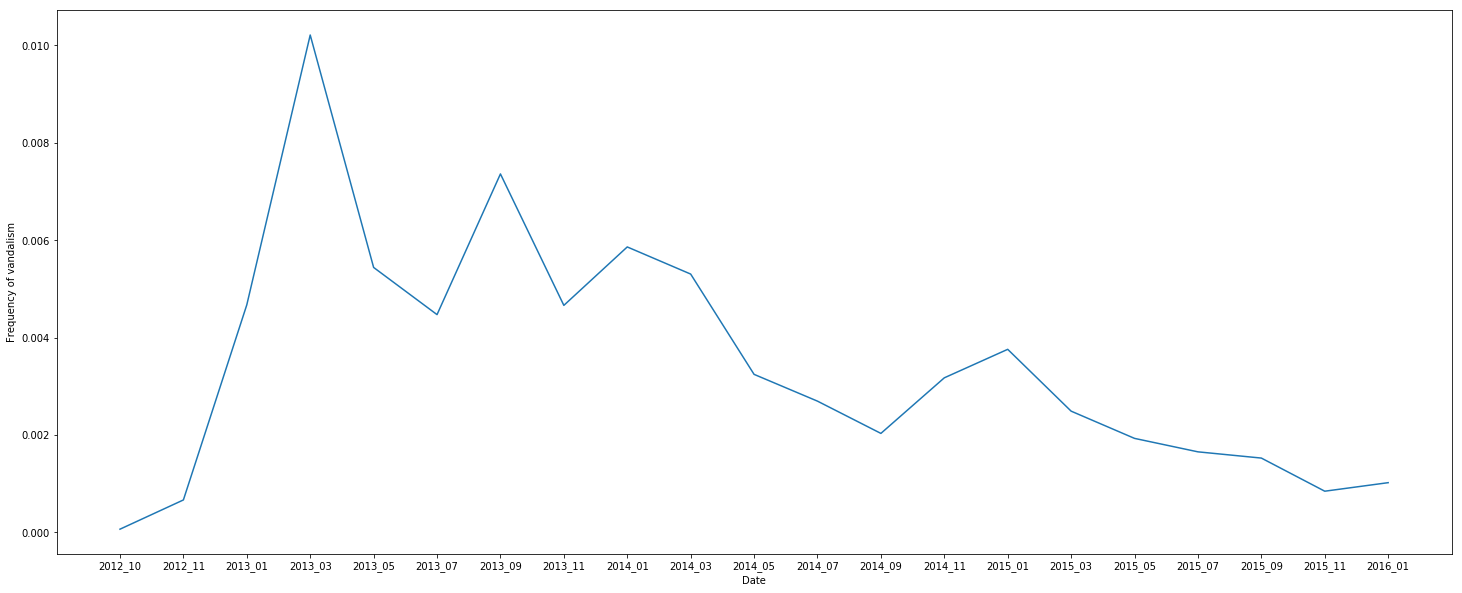

In [44]:
plt.figure(figsize=(25,10))
plt.plot(dates, vandalism_frequency)
plt.xlabel('Date')
plt.ylabel('Frequency of vandalism')
plt.show()

In [ ]:
anonymous_count = {}
user_count = {}
date_index = 0
for file_path in feathers:
    df = feather.read_dataframe(file_path)
    vandal_rows = df.loc[df['truth'] == 1]
    anonymous_count[dates[date_index]] = vandal_rows.user_id.value_counts()[-1]
    user_count[dates[date_index]] = vandal_rows.shape[0] - anonymous_count[dates[date_index]]
    print 'done with %s' % file_path
    date_index += 1

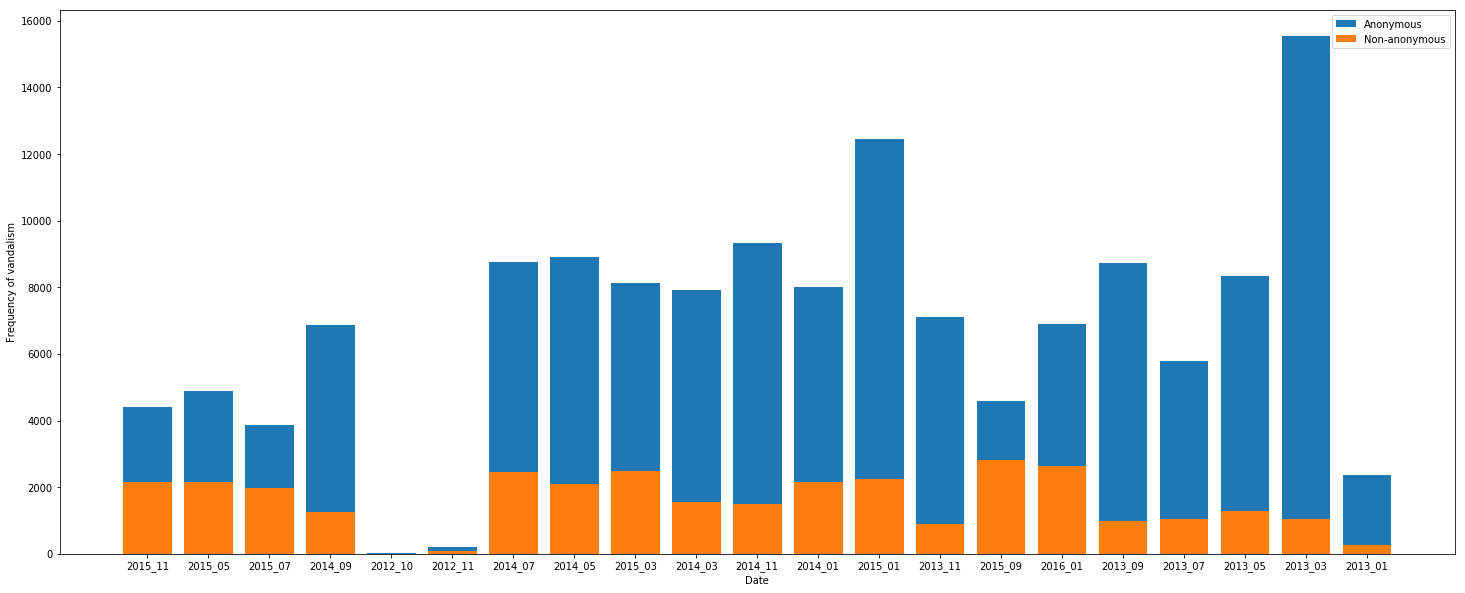

In [56]:
plt.figure(figsize=(25,10))
ax = plt.subplot(111)
ax.bar(range(len(anonymous_count)), anonymous_count.values(), align='center')
ax.bar(range(len(user_count)), user_count.values(), align='center')
ax.legend(('Anonymous', 'Non-anonymous'))
plt.xticks(range(len(anonymous_count)), anonymous_count.keys())
plt.xlabel('Date')
plt.ylabel('Frequency of vandalism')
plt.show()

In [ ]:
revisionc_to_vandalisms = {}
for file_path in feathers:
    df = feather.read_dataframe(file_path)
    vandal_revision_counts = df.loc[df['truth'] == 1].revision_count.value_counts().to_dict()
    for key in vandal_revision_counts:
        if key in revisionc_to_vandalisms:
            revisionc_to_vandalisms[key] += vandal_revision_counts[key]
        else:
            revisionc_to_vandalisms[key] = vandal_revision_counts[key]
    print 'done with %s' % file_path

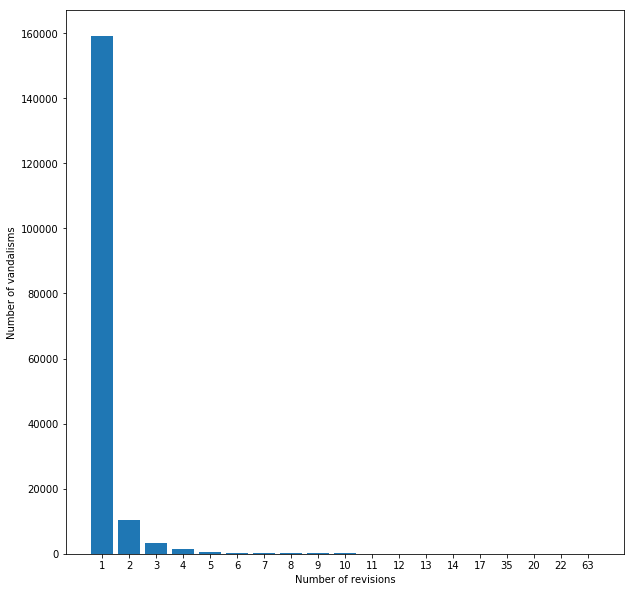

In [68]:
plt.figure(figsize=(10,10))
plt.bar(range(len(revisionc_to_vandalisms)), revisionc_to_vandalisms.values(), align='center')
plt.xticks(range(len(revisionc_to_vandalisms)), list(revisionc_to_vandalisms.keys()))
plt.xlabel('Number of revisions')
plt.ylabel('Number of vandalisms')
plt.show()

In [ ]:
country_vand_counts = {}
continent_vand_counts = {}
for file_path in feathers:
    df = feather.read_dataframe(file_path)
    country_counts = df.loc[df['truth'] == 1].meta.str.extract('USER_COUNTRY_CODE=([A-Z]+)').value_counts().to_dict()
    continent_counts = df.loc[df['truth'] == 1].meta.str.extract('USER_CONTINENT_CODE=([A-Z]+)').value_counts().to_dict()
    for key in country_counts:
        if key in country_vand_counts:
            country_vand_counts[key] += country_counts[key]
        else:
            country_vand_counts[key] = country_counts[key]
    for key in continent_counts:
        if key in continent_vand_counts:
            continent_vand_counts[key] += continent_counts[key]
        else:
            continent_vand_counts[key] = continent_counts[key]
    print 'done with %s' % file_path

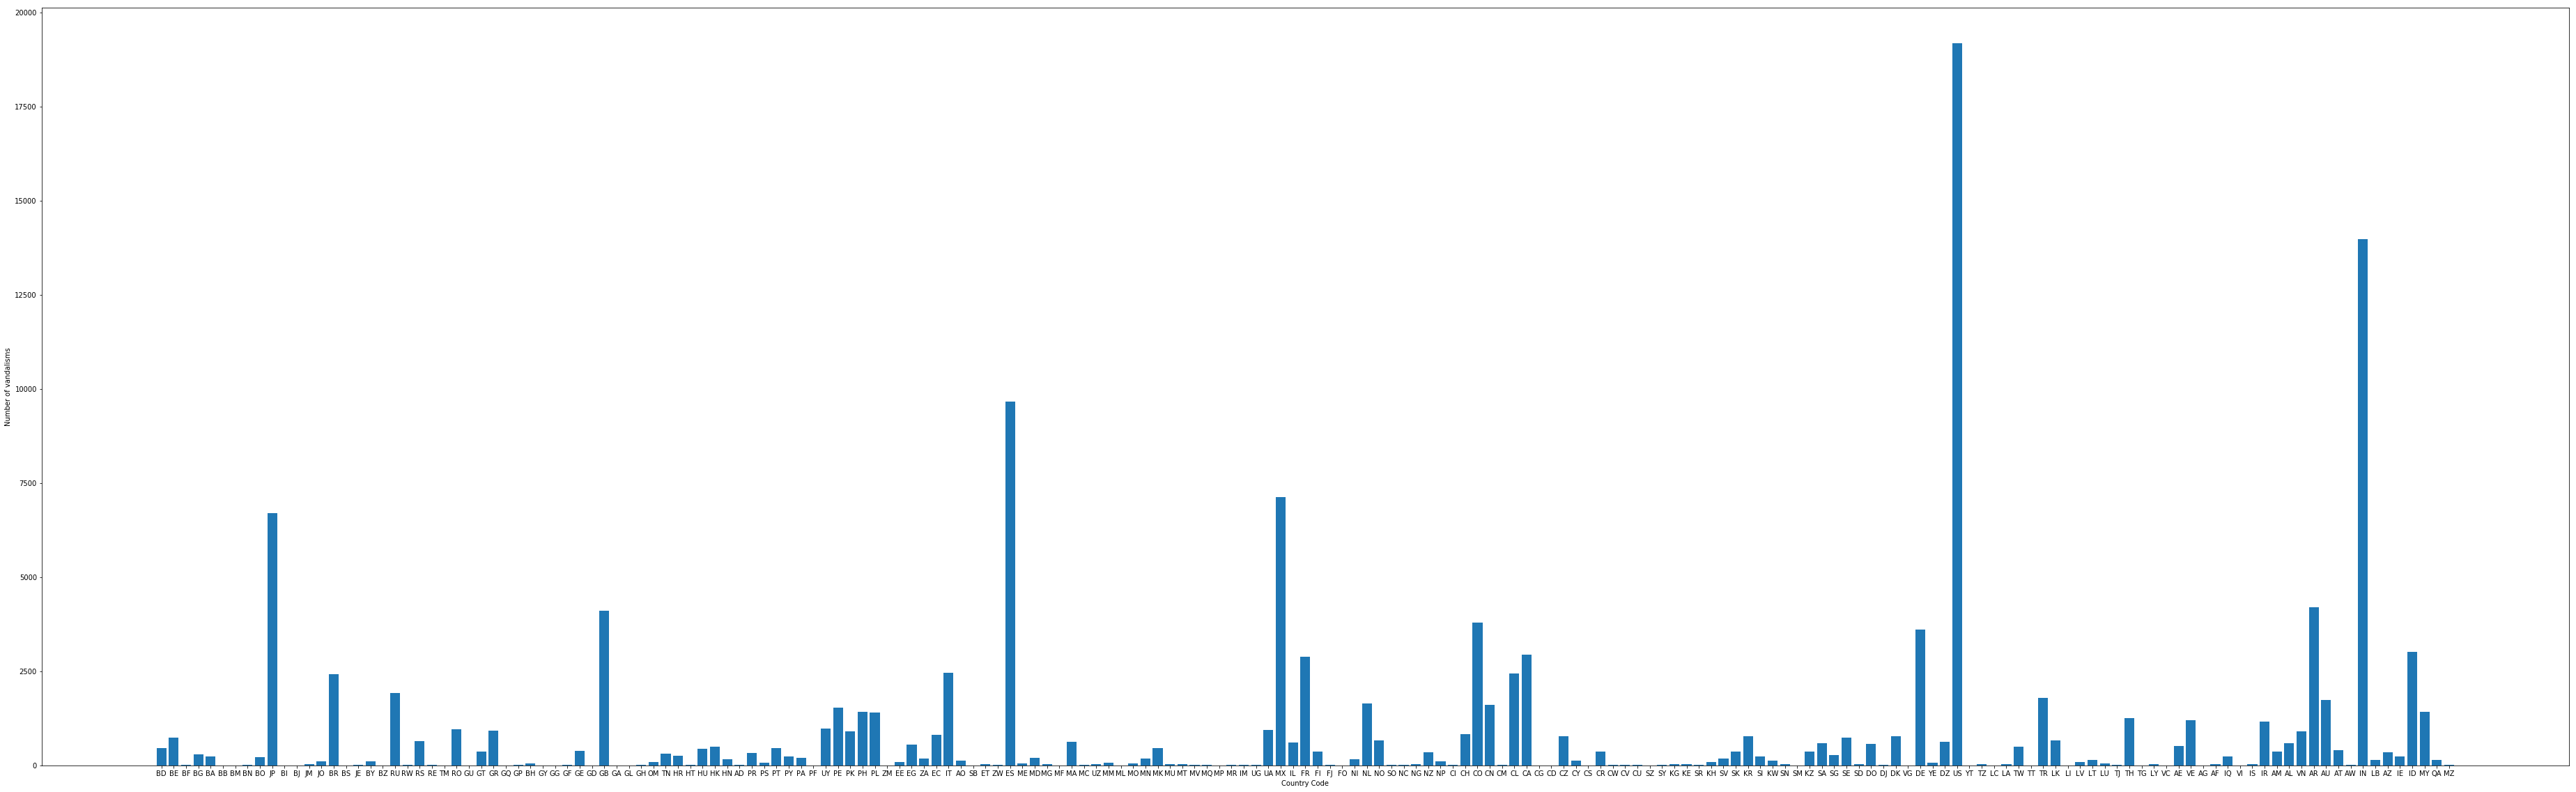

In [93]:
plt.figure(figsize=(65,20))
plt.bar(range(len(country_vand_counts)), country_vand_counts.values(), align='center')
plt.xticks(range(len(country_vand_counts)), list(country_vand_counts.keys()))
plt.xlabel('Country Code')
plt.ylabel('Number of vandalisms')
plt.show()

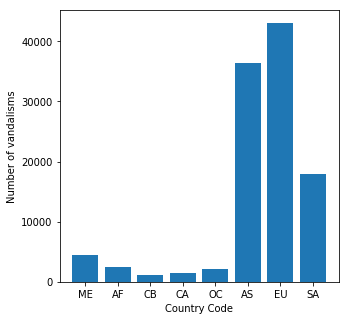

In [92]:
plt.figure(figsize=(5,5))
plt.bar(range(len(continent_vand_counts)), continent_vand_counts.values(), align='center')
plt.xticks(range(len(continent_vand_counts)), list(continent_vand_counts.keys()))
plt.xlabel('Country Code')
plt.ylabel('Number of vandalisms')
plt.show()